# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np
#np.seterr(over='ignore')
import scipy as sp

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import aplpy
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

/Users/martin/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


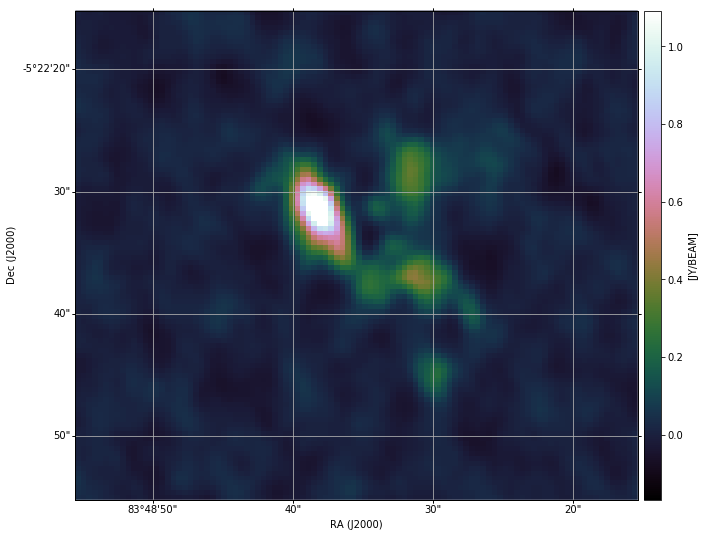

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data, wcs, hdu = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

/Users/martin/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


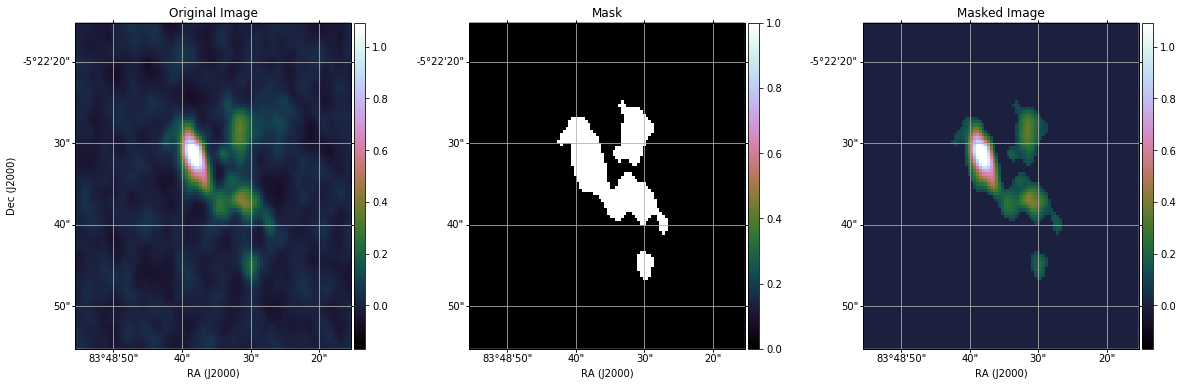

back_level:  0.10237737624469602


In [3]:
preprocessing(data, wcs)

/Users/martin/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


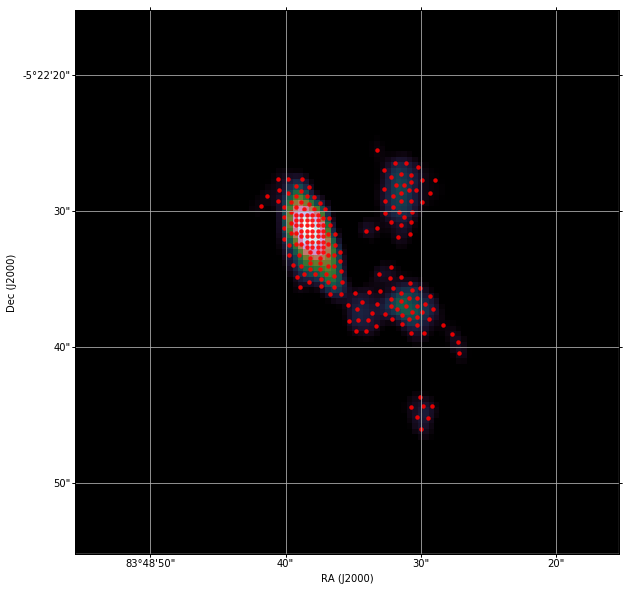

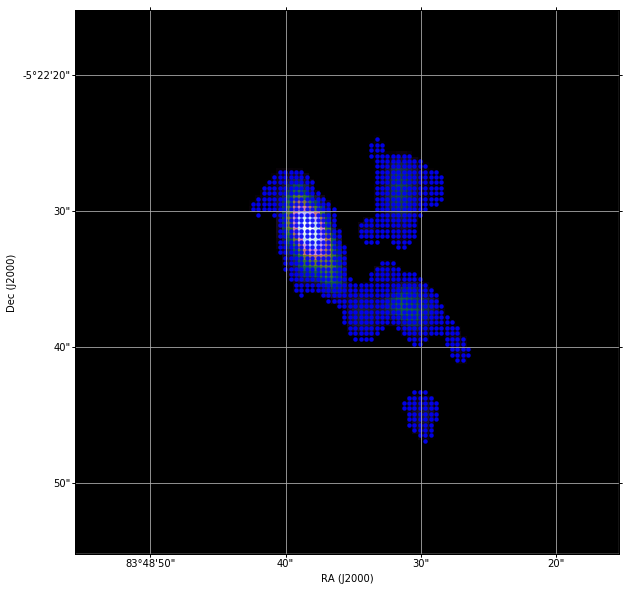

../lib/utils.py:143: RuntimeWarning: divide by zero encountered in log
  return 0.5*np.log((1+x)/(1-x))


In [4]:
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_center=200)
hdmc_c = copy.deepcopy(hdmc)

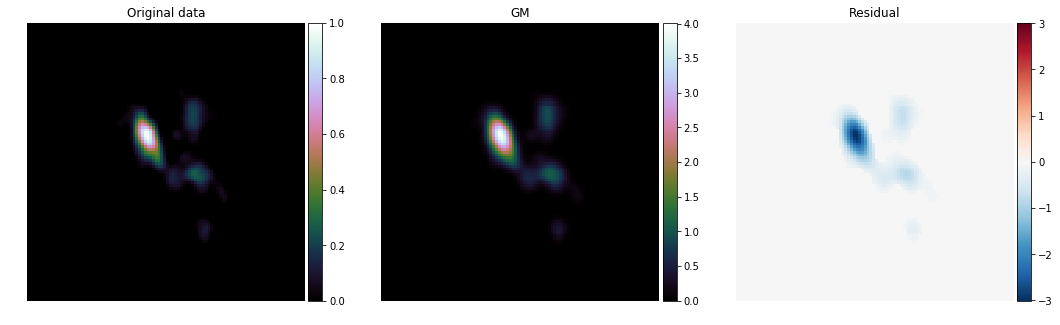

RESIDUAL STATS
RMS of residual: 0.2246465948398223
Variance of residual: 0.04871555463932611
Normalized flux addition: 3.739813377945482
Normalized flux lost: 0.0


In [6]:
hdmc.get_residual_stats();

In [5]:
u = hdmc.get_approximation()

In [6]:
w,sig = hdmc.get_params_mapped()
u = gm_eval(w, sig, hdmc.xc, hdmc.yc, hdmc.xe, hdmc.ye)
print(u.max())

1.0022626723078079


In [7]:
from fgm_eval import gm_eval_trunc_thread as gm_eval_fast

In [8]:
cp = np.vstack((hdmc.xc, hdmc.yc)).T
ep = np.vstack((hdmc.xe, hdmc.ye)).T

In [9]:
ni,niaux = compute_neighbors(cp, ep, hdmc.maxsig)

In [21]:
np.max(gm_eval_fast(w, sig, hdmc.xc, hdmc.yc, hdmc.xe, hdmc.ye, hdmc.nind1, hdmc.nind_aux1))

4.009050689231189

../lib/hdmclouds_v1.py:39: RuntimeWarning: invalid value encountered in less_equal
  mask0 = x<=0.
../lib/hdmclouds_v1.py:40: RuntimeWarning: invalid value encountered in greater_equal
  mask1 = x>=1.


xtol: 1e-07
ftol: 1e-07


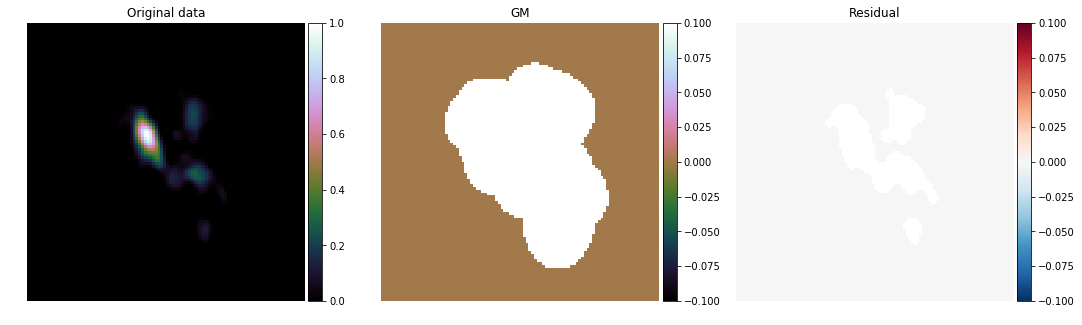

RESIDUAL STATS
RMS of residual: nan
Variance of residual: nan
Normalized flux addition: -0.0
Normalized flux lost: nan


../lib/hdmclouds_v1.py:275: RuntimeWarning: invalid value encountered in less
  flux_mask = residual<0.


In [6]:
hdmc.build_gmr()
hdmc.get_residual_stats();

In [7]:
hdmc.solver_output()

Solver Output:
success: True
status: 4
message: The cosine of the angle between func(x) and any column of the
  Jacobian is at most 0.000000 in absolute value
nfev: 802


In [8]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  nan
sig variation:  nan
